In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv("food_wastage_data.csv")
df.head()

,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
0,Meat,310,Corporate,450,Refrigerated,Regular,All Seasons,Buffet,Urban,Low,25
1,Meat,400,Birthday,500,Room Temperature,Regular,Winter,Buffet,Suburban,High,40
2,Vegetables,302,Birthday,371,Refrigerated,Regular,Summer,Buffet,Suburban,Low,27
3,Meat,491,Birthday,497,Refrigerated,Regular,All Seasons,Finger Food,Rural,High,32
4,Meat,300,Corporate,400,Refrigerated,Regular,Winter,Finger Food,Urban,Moderate,25


In [29]:
df.tail()

,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
1777,Baked Goods,310,Corporate,350,Room Temperature,Regular,Summer,Finger Food,Urban,High,35
1778,Baked Goods,284,Social Gathering,443,Room Temperature,Regular,Winter,Buffet,Rural,Low,32
1779,Fruits,220,Wedding,300,Room Temperature,Regular,All Seasons,Finger Food,Urban,Moderate,15
1780,Fruits,250,Wedding,350,Room Temperature,Regular,All Seasons,Finger Food,Rural,Moderate,20
1781,Baked Goods,400,Wedding,500,Room Temperature,Regular,Winter,Sit-down Dinner,Rural,High,45


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Type of Food           1782 non-null   object
 1   Number of Guests       1782 non-null   int64 
 2   Event Type             1782 non-null   object
 3   Quantity of Food       1782 non-null   int64 
 4   Storage Conditions     1782 non-null   object
 5   Purchase History       1782 non-null   object
 6   Seasonality            1782 non-null   object
 7   Preparation Method     1782 non-null   object
 8   Geographical Location  1782 non-null   object
 9   Pricing                1782 non-null   object
 10  Wastage Food Amount    1782 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 153.3+ KB


In [31]:
df.describe()

,Number of Guests,Quantity of Food,Wastage Food Amount
count,1782.000000,1782.000000,1782.000000
mean,317.804714,411.125701,28.536476
std,67.829658,65.204674,10.461317
min,207.000000,280.000000,10.000000
25%,267.000000,350.000000,20.000000
50%,302.000000,400.000000,26.500000
75%,350.000000,480.000000,35.000000
max,491.000000,500.000000,63.000000


Yemek Türleri

In [32]:
df["Type of Food"].unique()

array(['Meat', 'Vegetables', 'Fruits', 'Baked Goods', 'Dairy Products'],
      dtype=object)

Hangi etkinlik türünde kaç adet organizasyon olmuş?

In [33]:
df[["Event Type"]].value_counts().reset_index()

,Event Type,count
0,Corporate,515
1,Social Gathering,461
2,Wedding,438
3,Birthday,368


Bu organizasyonlara toplam kaç kiçi katılmış?

In [34]:
df.groupby("Event Type")["Number of Guests"].sum().reset_index()

,Event Type,Number of Guests
0,Birthday,118552
1,Corporate,162429
2,Social Gathering,144677
3,Wedding,140670


Hangi etkinlik türünde ne kadar yiyecek miktarı var?

In [35]:
eventType_foodCount=df.groupby("Event Type")["Quantity of Food"].sum().reset_index()
eventType_foodCount

,Event Type,Quantity of Food
0,Birthday,151092
1,Corporate,211485
2,Social Gathering,187588
3,Wedding,182461


Etkinlik Türüne Göre İsraf Edilen Yiyecek Miktarı

Text(0.5, 1.0, 'Wastage Food Amount By Event Type')

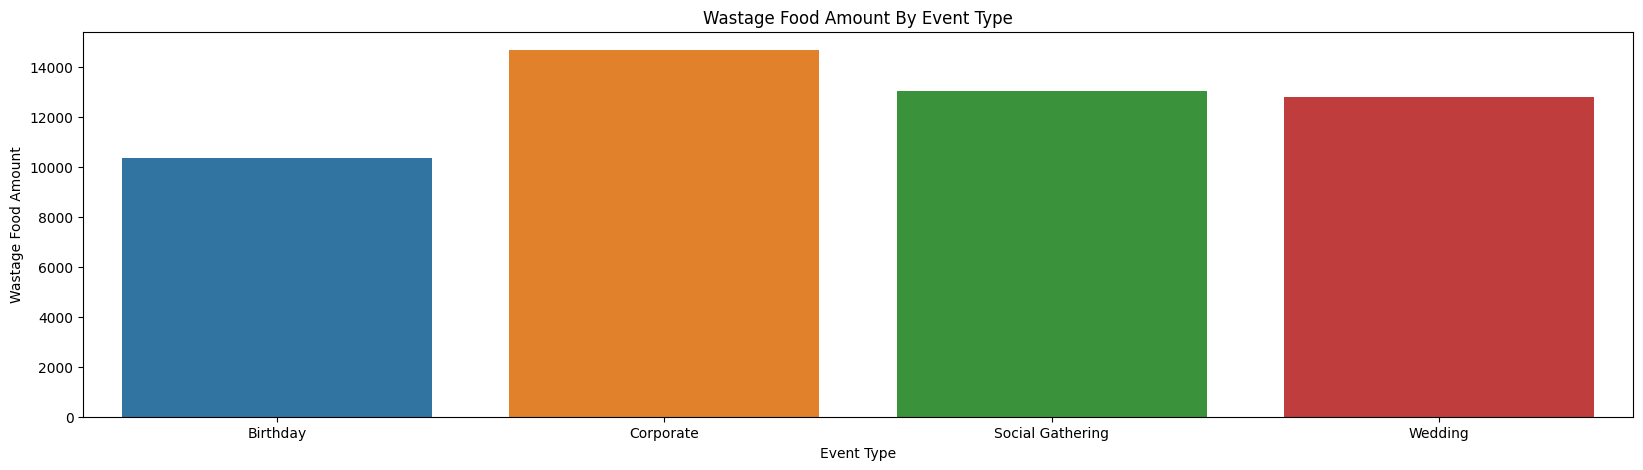

In [36]:
waste_event=df.groupby("Event Type")["Wastage Food Amount"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Event Type",y="Wastage Food Amount", data=waste_event, hue="Event Type")
plt.title("Wastage Food Amount By Event Type")

Yemek Türüne Göre İsraf Edilen Yiyecek Miktarı

Text(0.5, 1.0, 'Wastage Food Amount By Type of Food')

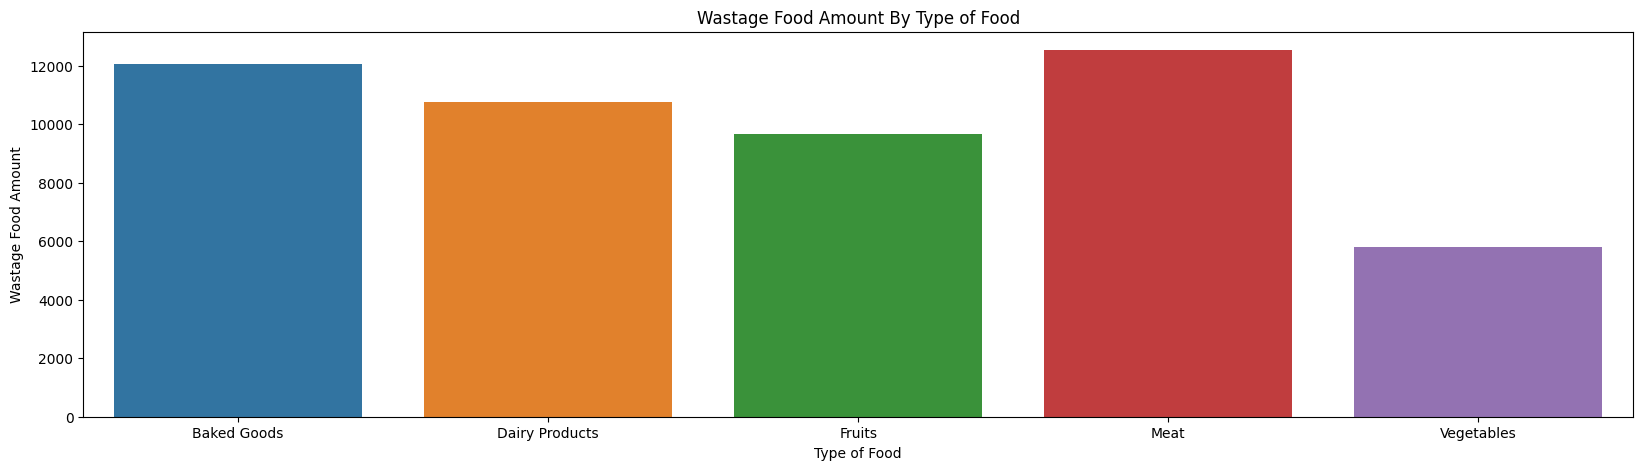

In [37]:
waste_event=df.groupby("Type of Food")["Wastage Food Amount"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Type of Food",y="Wastage Food Amount", data=waste_event, hue="Type of Food")
plt.title("Wastage Food Amount By Type of Food")

Etkinliklerdeki yiyecek türlerine göre israf edilen yemek sayıları

Text(0.5, 1.0, 'Wastage Food Amount By Event Type')

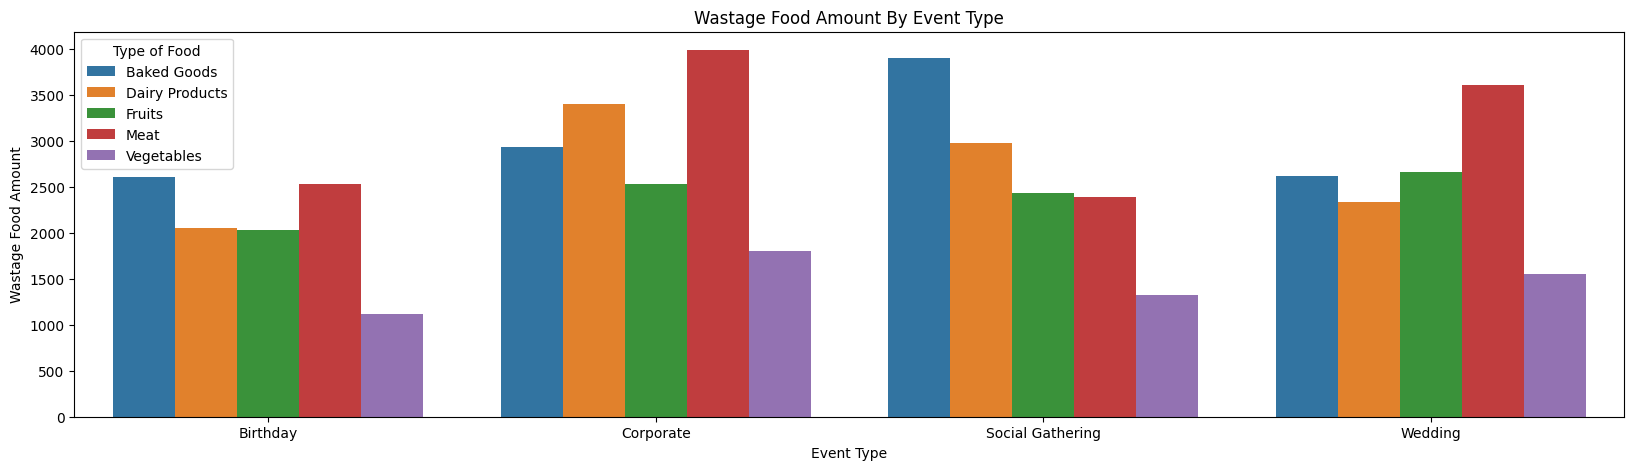

In [38]:
waste_type=df.groupby(["Event Type","Type of Food"])["Wastage Food Amount"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Event Type",y="Wastage Food Amount", data=waste_type, hue="Type of Food")
plt.title("Wastage Food Amount By Event Type")

Alım Türüne Göre (Ara Sıra - Düzenli) ve Depolama Koşullarına Göre (Buzdolabı - Oda Sıcaklığı) İsraf Miktarları

Text(0.5, 1.0, 'Waste Amount By Purchase and Storage')

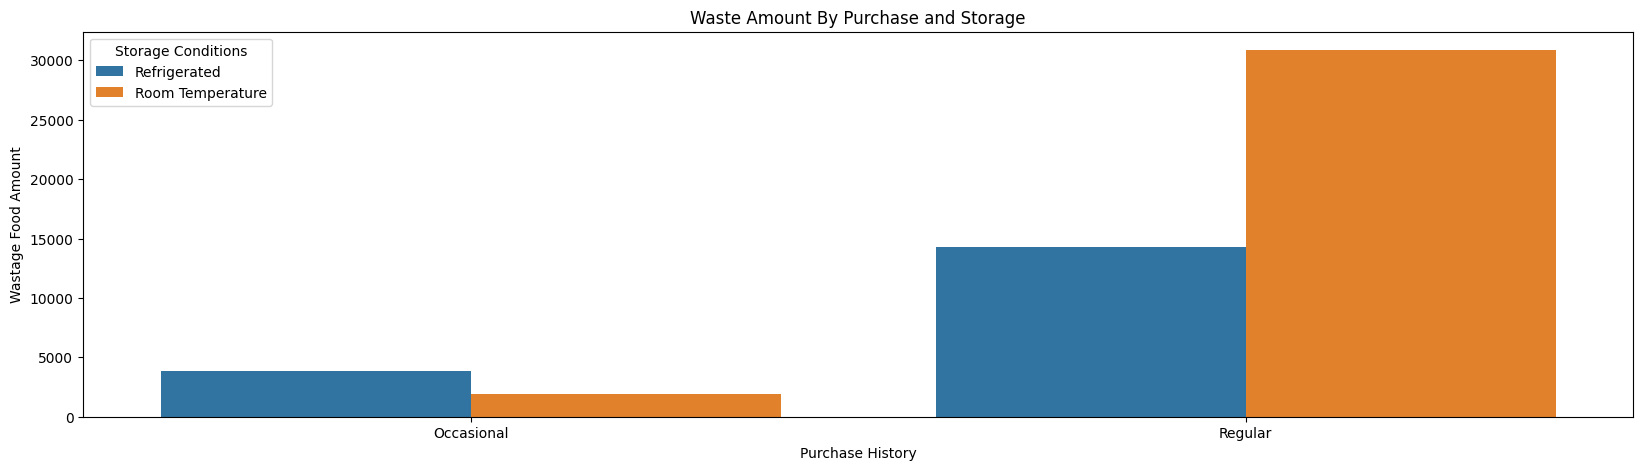

In [39]:
waste_storage_and_purchase=df.groupby(["Storage Conditions","Purchase History"])["Wastage Food Amount"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Purchase History", y="Wastage Food Amount", hue="Storage Conditions", data=waste_storage_and_purchase)
plt.title("Waste Amount By Purchase and Storage")

In [40]:
df["Seasonality"].unique()

array(['All Seasons', 'Winter', 'Summer'], dtype=object)

Depolama Koşulları, Satın Alma Geçmişi ve Mevsimlere Göre Gıda İsrafı Analizi

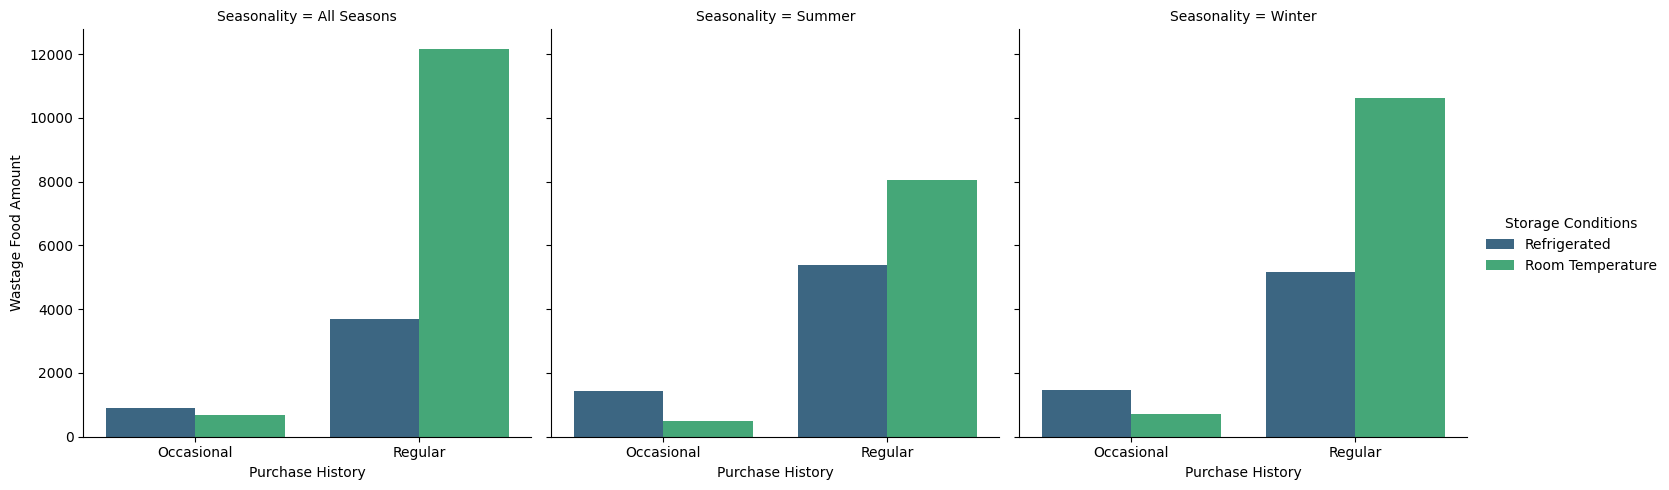

In [41]:
waste_storage_purchase=df.groupby(["Storage Conditions","Purchase History","Seasonality"])["Wastage Food Amount"].sum().reset_index()
sns.catplot(x="Purchase History", y="Wastage Food Amount", hue="Storage Conditions", col="Seasonality", data=waste_storage_purchase, kind="bar", palette="viridis")

In [42]:
df["Preparation Method"].unique()

array(['Buffet', 'Finger Food', 'Sit-down Dinner'], dtype=object)

Servis türüne göre etkinliklerdeki israf edilen yemek miktarı

Text(0.5, 1.0, 'Wastage Food Amount By Preparation Method')

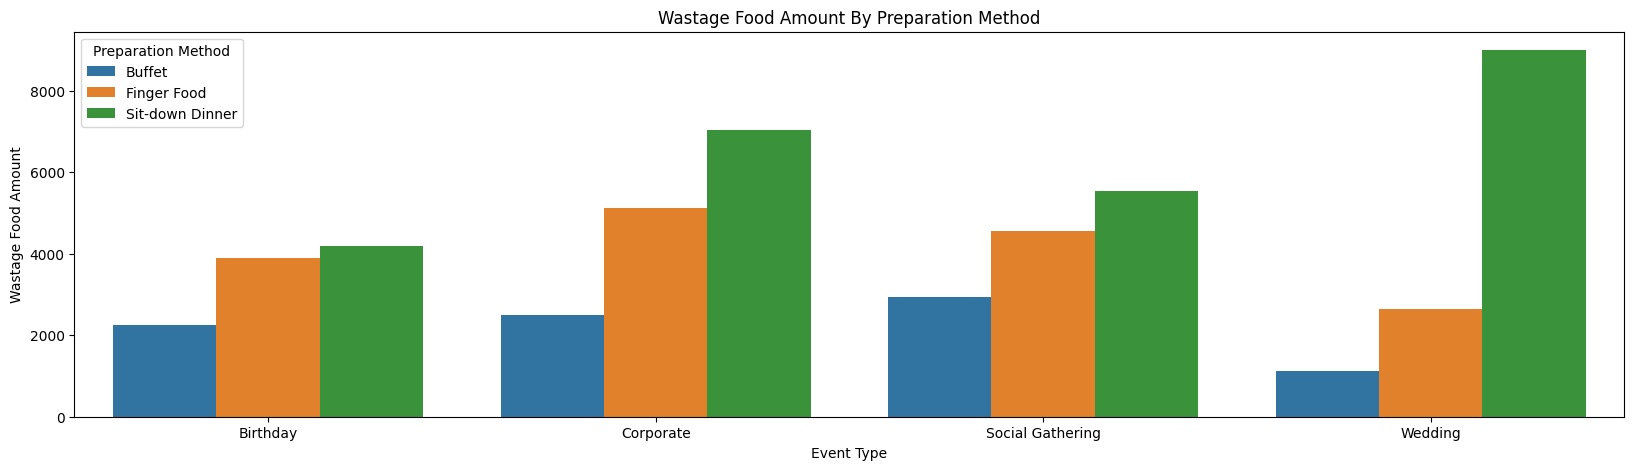

In [43]:
waste_event=df.groupby(["Preparation Method","Event Type"])["Wastage Food Amount"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Event Type",y="Wastage Food Amount", data=waste_event, hue="Preparation Method")
plt.title("Wastage Food Amount By Preparation Method")

Coğrafi bölgelere göre alım fiyatları ve israf sayıları

Text(0.5, 1.0, 'Wastage Food Amount By Geographical Location')

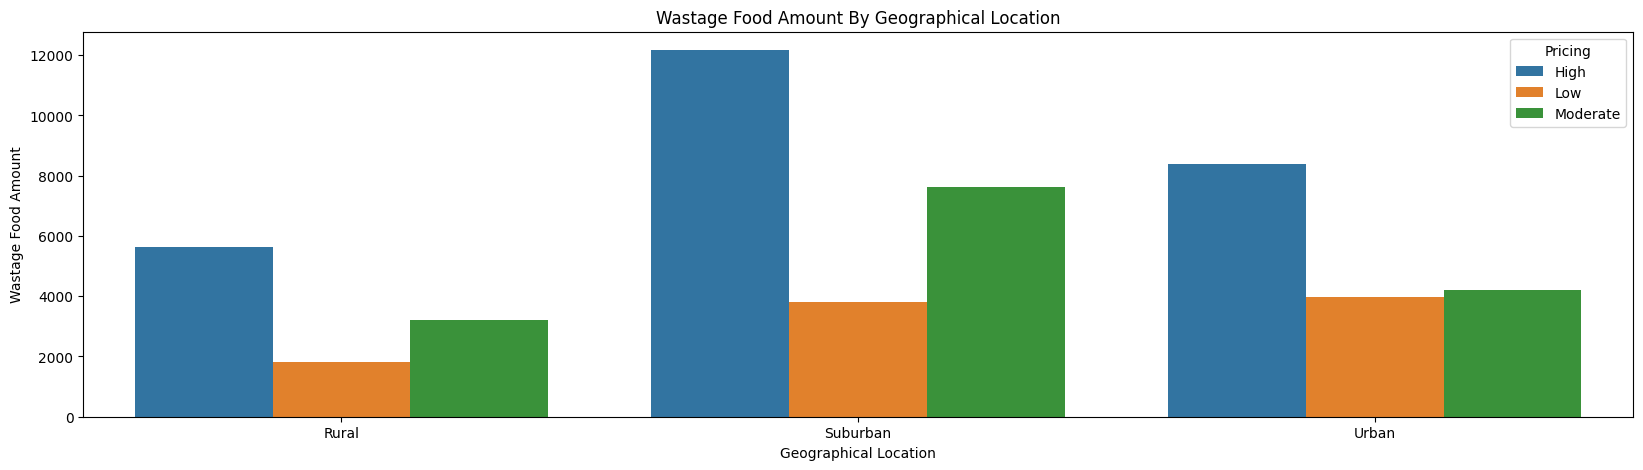

In [44]:
waste_event=df.groupby(["Geographical Location","Pricing"])["Wastage Food Amount"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Geographical Location",y="Wastage Food Amount", data=waste_event, hue="Pricing")
plt.title("Wastage Food Amount By Geographical Location")

Misafir sayısı ile atık gıda miktarı arasındaki ilişki

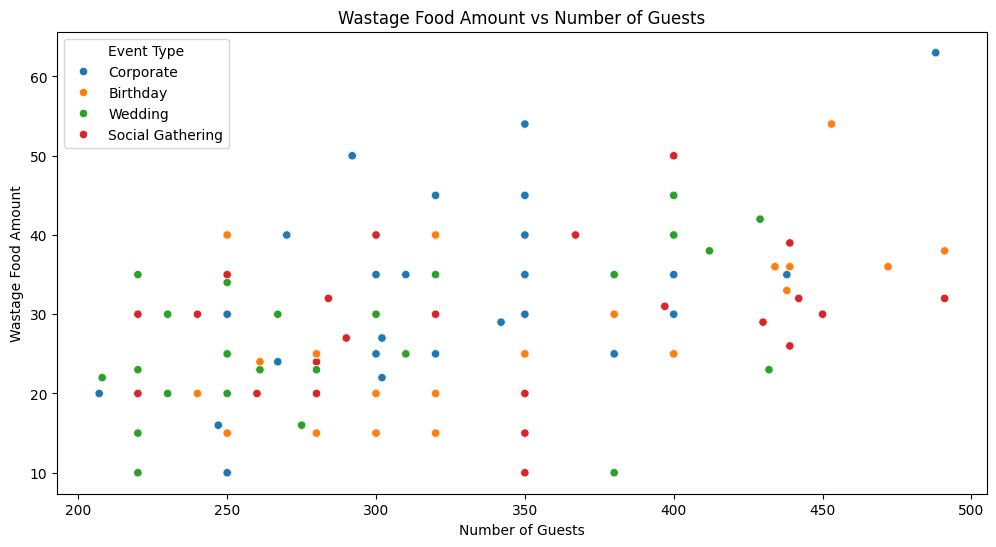

In [45]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Number of Guests", y="Wastage Food Amount", hue="Event Type", data=df)
plt.title("Wastage Food Amount vs Number of Guests")
plt.xlabel("Number of Guests")
plt.ylabel("Wastage Food Amount")
plt.show()
